<a href="https://colab.research.google.com/github/Tanisha2910/Bike-Rental-Prediction/blob/master/BikeRental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import io
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier
# from sklearn import cross validation
% matplotlib inline



In [2]:
from google.colab import files
uploaded = files.upload()

Saving day.csv to day.csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['day.csv']))

In [4]:
# print the head of the data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**EXPLORATORY DATA ANALYSIS**

In [5]:
# understanding the data
df.shape


(731, 16)

In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
df.info()

# data consist of Integer, float and Object(categorical) variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


UNIVARIATE ANALYSIS

In [9]:
# Target variable analysis

# describe statistics summary
df['cnt'].describe()


count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

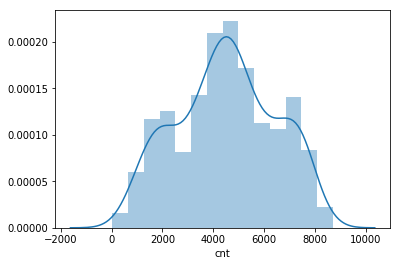

In [10]:
# check whether the target variable is normal or not
sns.distplot(df['cnt'])

# Target variable cnt is normally distributed

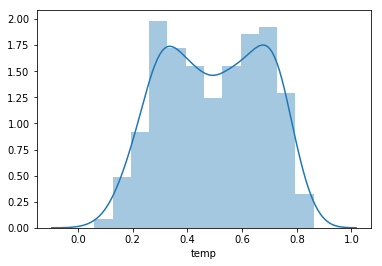

In [11]:
# Distribution of independent numeric variables
# cheq whether variable temp is normal or not
sns.distplot(df['temp']);


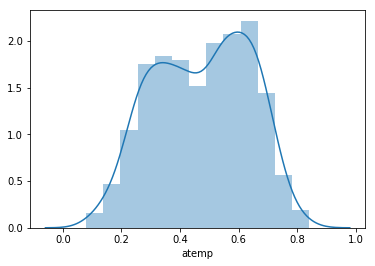

In [12]:
#  cheq whether variable atemp is normal or not
sns.distplot(df['atemp']);


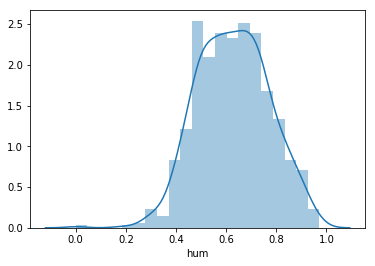

In [13]:
# check whether hum variable is normal or not
sns.distplot(df['hum']) 

# this seems slightly skewed to the left

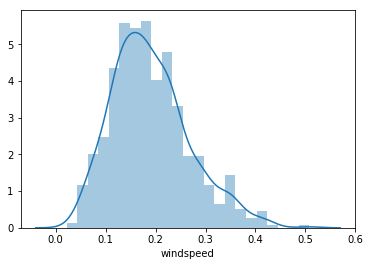

In [14]:
# check whether windspleed variable is normal or not
sns.distplot(df['windspeed'])

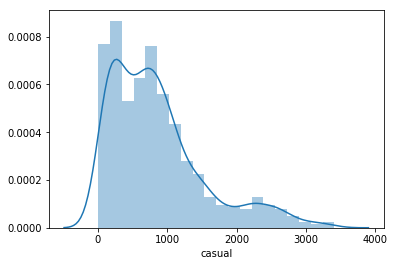

In [15]:
# check whether casual variable is normal or not
sns.distplot(df['casual'])

# this seems slightly skewed to the right
# this means that the chances of outliers are present in casual

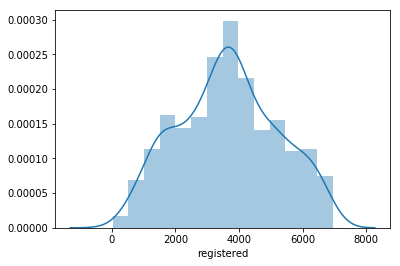

In [16]:
# check whether registeredvariable is normal or not
sns.distplot(df['registered'])

# this seems normally distributed

In [17]:
print("Skewness: %f" % df['cnt'].skew())
print("Kurtosis: %f" % df['cnt'].kurt())

# Here Skewness is very less so target variable is normally distributed

Skewness: -0.047353
Kurtosis: -0.811922


BIVARIATE ANALYSIS

In [18]:
# Relation between numerical variable temp and target variable cnt
df['temp'].value_counts()

0.265833    5
0.635000    5
0.437500    4
0.564167    4
0.649167    4
0.484167    4
0.680000    4
0.696667    4
0.710833    4
0.514167    3
0.282500    3
0.667500    3
0.459167    3
0.554167    3
0.733333    3
0.636667    3
0.606667    3
0.342500    3
0.731667    3
0.653333    3
0.393333    3
0.530000    3
0.343333    3
0.414167    3
0.353333    3
0.577500    3
0.775000    3
0.715833    3
0.274167    3
0.550000    3
           ..
0.834167    1
0.381667    1
0.346667    1
0.765833    1
0.640833    1
0.415833    1
0.545000    1
0.359167    1
0.365833    1
0.623333    1
0.160870    1
0.365217    1
0.712500    1
0.348696    1
0.096522    1
0.538333    1
0.361667    1
0.715000    1
0.711667    1
0.343478    1
0.335833    1
0.570000    1
0.282609    1
0.396667    1
0.404167    1
0.226957    1
0.354167    1
0.580833    1
0.231667    1
0.337500    1
Name: temp, Length: 499, dtype: int64

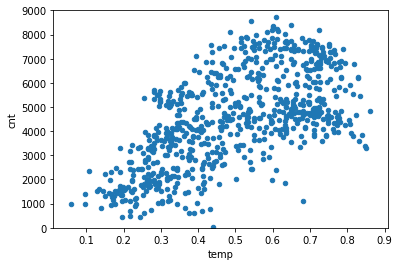

In [19]:
# Now draw scatter plot between 'temp' and 'cnt' variables
var = 'temp'
data = pd.concat([df['cnt'], df[var]], axis = 1)
data.plot.scatter(x = var, y = 'cnt', ylim = (0,9000))

In [20]:
# Relationship between Numerical cariable 'hum' and target variable 'cnt'
df['hum'].value_counts()

0.613333    4
0.568333    3
0.542500    3
0.752917    3
0.697083    3
0.630833    3
0.605000    3
0.590000    3
0.690000    3
0.729583    3
0.741250    3
0.552083    3
0.590417    3
0.483333    3
0.722917    3
0.538333    3
0.570000    3
0.862500    2
0.757500    2
0.434167    2
0.441250    2
0.672917    2
0.537917    2
0.410000    2
0.677500    2
0.805833    2
0.734583    2
0.668750    2
0.540833    2
0.694167    2
           ..
0.642500    1
0.422500    1
0.494167    1
0.616957    1
0.700833    1
0.640417    1
0.187917    1
0.414583    1
0.559167    1
0.691250    1
0.581667    1
0.561667    1
0.720417    1
0.896667    1
0.838750    1
0.797083    1
0.426250    1
0.457500    1
0.618333    1
0.609167    1
0.812917    1
0.810833    1
0.537500    1
0.712500    1
0.704167    1
0.615000    1
0.686667    1
0.480833    1
0.649565    1
0.741739    1
Name: hum, Length: 595, dtype: int64

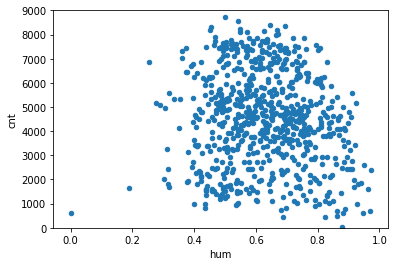

In [21]:
# now draw scatter plot between 'hum' and 'cnt' variable
df['hum'].value_counts()

# # Now draw a scatter plot between 'hum' and 'cnt' variables
var = 'hum'
data = pd.concat([df['cnt'], df[var]], axis = 1)
data.plot.scatter(x = var, y = 'cnt', ylim = (0,9000))

# ot looks like there is a average relationship between hum and cnt

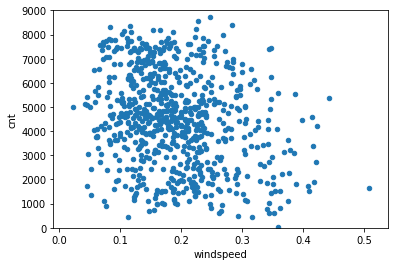

In [23]:
# relation between numerical variable 'windspeed' and target variable 'cnt'
df['windspeed'].value_counts()

# now draw a scatter plot between 'windspeed' and 'cnt' variables

var = 'windspeed'
data = pd.concat([df['cnt'], df[var]], axis = 1)
data.plot.scatter(x = var, y = 'cnt', ylim = (0,9000))

# it shows a negative relation between 'wnidspeed' and 'cnt'

(-0.5, 6.5, 0, 9000)

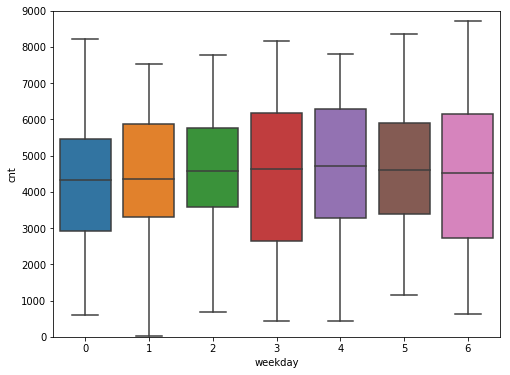

In [24]:
# Boxplot 'weekdays' with 'cnt'
var_weekdays = 'weekday'
data = pd.concat([df['cnt'],df[var_weekdays]], axis = 1)
f, ax = plt.subplots(figsize = (8, 6))
fig = sns.boxplot(x = var_weekdays, y = 'cnt', data = data)
fig.axis(ymin = 0, ymax = 9000)

# below boxplot is saying that median high on holidays when compared to weekdays

MISSING VALUE ANALYSIS

In [25]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
cnt,0,0.0
registered,0,0.0
casual,0,0.0
windspeed,0,0.0
hum,0,0.0
atemp,0,0.0
temp,0,0.0
weathersit,0,0.0
workingday,0,0.0
weekday,0,0.0


In [0]:
# Already all the numeric variable are normalize form so, we are not analysing outliers here

# here the six numerics variables are present out of six, four variables are in normalize form
# temp, atemp, hum, windspread are in normalize form no need to check outliers
# casual and registered have to check outliers

df_1 = df.copy()

OUTLIER ANALYSIS

0.6728044333386833

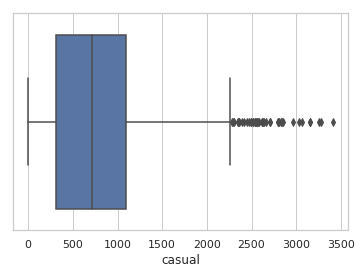

In [27]:
df.head()

# plt.boxplot(df_1['casual'])

sns.set(style = 'whitegrid')
ax = sns.boxplot(x = df['casual'])
# It seems outliers are present in 'Casual' variable but we are keeping as it will detect and conver outliers during tuning 

# Correlation before outlier treatment
# correlation between 'casual' and 'cnt' before removal of outliers


df['casual'].corr(df['cnt'])

-855.25
2266.75


0.6460020508747333

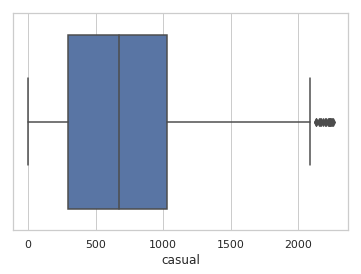

In [29]:
cnames = ['casual']
for i in cnames:
    q75, q25 = np.percentile(df.loc[:, i], [75, 25])
    iqr = q75 - q25
    
min = q25 - (iqr * 1.5)
max = q75 + (iqr * 1.5)

print(min)
print(max)

df_day_out = df.copy()

df_day_out = df_day_out.drop(df_day_out[df_day_out.loc[:, i] < min].index)
df_day_out = df_day_out.drop(df_day_out[df_day_out.loc[:, 'casual'] > max].index)

# Boxplot for casual after a outlier removal

sns.set(style = 'whitegrid')
ax = sns.boxplot(x = df_day_out['casual'])

# Correlation between 'casual' and 'cnt' after outlier removal
df_day_out['casual'].corr(df_day_out['cnt'])

FEATURE SELECTION

In [30]:
# Selection of numerical features based on Pearson corelation
day_numeric = df.loc[:, ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]

# draw correlation matrix between all numeric variables and analyse what are the variables are important
day_numeric.corr(method = 'pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'),axis = 1)

# Color dark blue indicates that there is a stron positive relationship and if darkness is decreasing means relationship between variables are decreasing
# color dark red indicates there is a strong negative relationship and if darkness is decreasing indicates relationshiv between variables are decreasing

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.0,0.99,0.13,-0.16,0.54,0.54,0.63
atemp,0.99,1.0,0.14,-0.18,0.54,0.54,0.63
hum,0.13,0.14,1.0,-0.25,-0.077,-0.091,-0.1
windspeed,-0.16,-0.18,-0.25,1.0,-0.17,-0.22,-0.23
casual,0.54,0.54,-0.077,-0.17,1.0,0.4,0.67
registered,0.54,0.54,-0.091,-0.22,0.4,1.0,0.95
cnt,0.63,0.63,-0.1,-0.23,0.67,0.95,1.0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


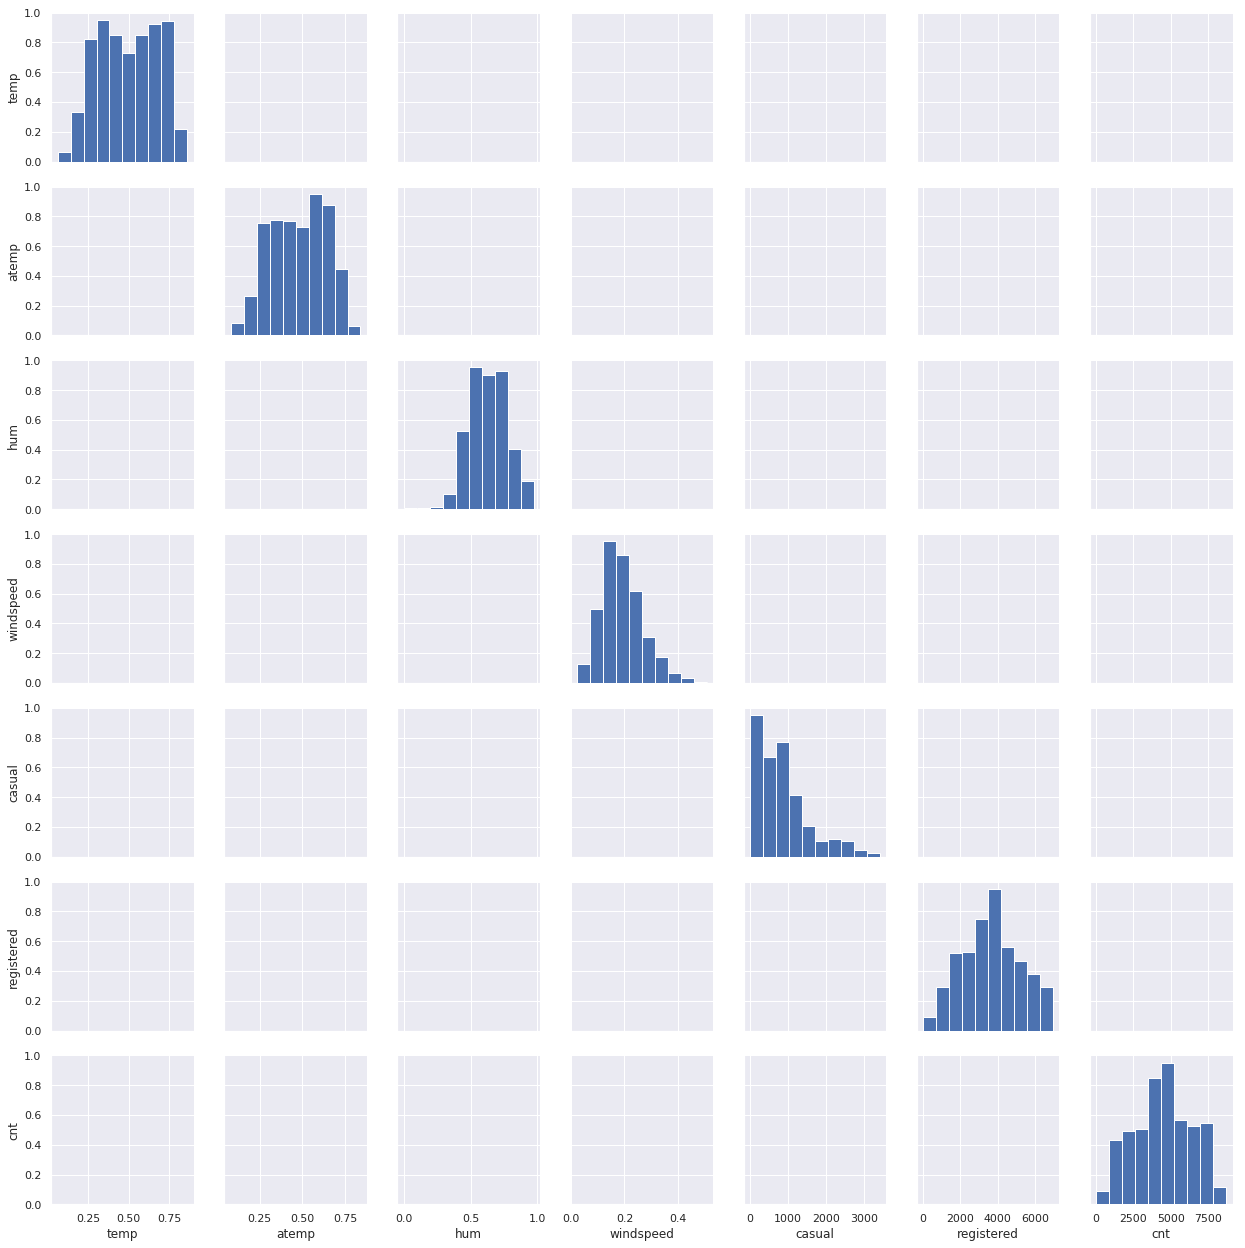

       temp  windspeed  casual  registered   cnt
0  0.344167   0.160446     331         654   985
1  0.363478   0.248539     131         670   801
2  0.196364   0.248309     120        1229  1349
3  0.200000   0.160296     108        1454  1562
4  0.226957   0.186900      82        1518  1600
(731, 5)


In [31]:
# check relationship between scatter plots
sns.set()
cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
sns.pairplot(day_numeric[cols], size = 2.5, kind = 'red')
plt.show()

# As per scatter plots and above correlation graph there is a strong relation between independent variable 'temp' and 'atemp'
# and there is a poor relation between independent variable 'hum' and dependent variable 'cnt'
# sodropping 2 variables from feature selection
numeric_features = day_numeric.loc[:,['temp', 'windspeed', 'casual', 'registered', 'cnt']]
print(numeric_features.head())
print(numeric_features.shape)

FEATURE SCALING

In [32]:
###############################  NORMALITY CHECK  ###################################
cnames = ['casual','registered']

for i in cnames :
    print(i)
    df[i] = (df[i] - min(df[i]))/(max(df[i]) - min(df[i]))

df.head()

casual


TypeError: ignored

In [0]:
# Now i an not checking categorical feature importance i will check it later during tuning process
# Now for variable not doing Data Scaling this will do during tuning process

In [34]:
# Divide train and test data using sklearn train_test_split

df_feature_selection = df.drop(['atemp', 'hum'], axis = 1)
print(df_feature_selection.shape)

from sklearn.model_selection import train_test_split
train, test = train_test_split(df_feature_selection, test_size = 0.2)

# train.shape
train.head()
# test.shape
# test.head()

(731, 14)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,windspeed,casual,registered,cnt
466,467,2012-04-11,2,1,4,0,3,1,1,0.348696,0.295274,482,4380,4862
446,447,2012-03-22,2,1,3,0,4,1,1,0.554167,0.117562,1334,5537,6871
717,718,2012-12-18,4,1,12,0,2,1,1,0.410833,0.221404,433,5124,5557
412,413,2012-02-17,1,1,2,0,5,1,1,0.343333,0.205846,349,3805,4154
251,252,2011-09-09,3,0,9,0,5,1,2,0.650000,0.124379,417,3127,3544


DECISION TREE

In [36]:
# Import decision tree from sklearn library

from sklearn.tree import DecisionTreeRegressor
train_features_one = train[['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit', 'temp', 'windspeed', 'casual', 'registered']].values
train_target_feature = train['cnt'].values
test_feature = test[['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit', 'temp', 'windspeed', 'casual', 'registered']].values
test_target_feature = test['cnt'].values
train_features_one

# Implement decision Tree algorithm
# Fit your first decision tree: my_tree_one
my_tree_one = DecisionTreeRegressor()
my_tree_one = my_tree_one.fit(train_features_one, train_target_feature)
print(my_tree_one)

# Decision Tree for Regressor
# fit_DT = DecisionTreeRegressor(max_depth = 2).fit(train.iloc[:,2:13], train.iloc[:,13])

# Apply model on test data
predictions_DT = my_tree_one.predict(test_feature)

print(predictions_DT)

# predict by using predict method

# predictions_DT = my_tree_one.predict(test_feature)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
[4401. 4318. 5375. 3709. 6041. 7870. 7105. 2689. 6969. 2744. 7421. 2162.
 6978. 2114. 5572. 2471. 7347. 3577. 1606. 3659. 6917. 3606. 5345. 6691.
 7733. 4128. 6269. 7765. 1263. 1815. 4665. 1746. 4891. 4586. 4906. 2115.
 2732.  986. 1944. 4150. 1421. 3285. 2744. 5634. 5531. 6169. 7216. 7498.
 6824. 4649. 6436. 6203. 6685. 4792. 3744. 3926. 2431. 4687. 7499. 5202.
 1985. 4679. 5531. 2802. 4803. 7460. 6691. 3846. 4839. 3348. 1096. 4274.
 3606. 6871. 5117. 4991. 1011. 4484. 8555. 3644. 5532. 5923. 4326. 6691.
 4302.  822. 6598. 7865. 4630. 5117. 7765. 7129. 3214. 4679. 6639. 3126.
 3867. 5062. 3126. 4118. 6398. 4322. 7499. 4862. 6691. 3744

In [37]:
# Calculate MAPE
def MAPE(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
  
MAPE(test_target_feature, predictions_DT)

# ErroR is gettting as "4.84"

3.7806792951346675

In [38]:
# control overfitting by setting "max_depth" to 10 and "min_samples_split" to 5 : my_tree_two
max_depth = 8
min_samples_split = 4
my_tree_two = DecisionTreeRegressor(max_depth = max_depth, min_samples_split = min_samples_split, random_state = 1)
my_tree_two = my_tree_two.fit(train_features_one, train_target_feature)
print(my_tree_two)

predictions_DT_two = my_tree_two.predict(test_feature)
print(predictions_DT_two)

MAPE(test_target_feature, predictions_DT_two)


DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')
[4396.33333333 4423.         5333.2        3650.41176471 6030.16666667
 7798.         7303.4        2689.         6587.8        2727.625
 7502.65384615 2139.5        7079.66666667 2139.5        5438.75
 2471.         7502.65384615 3650.41176471 1617.         3650.41176471
 7058.625      3606.         5317.66666667 6628.         7632.
 4123.5        6169.42857143 7502.65384615 1263.         1813.66666667
 4652.8        1709.6        4772.63636364 4554.33333333 4984.5
 2139.5        2727.625       975.33333333 2053.25       4124.
 1439.         3285.         2727.625      5666.         5585.33333333
 6186.         7058.625      7486.2        6

3.9522197468032627

In [39]:
# RSS - Residual Sum
# test_target_feature, prediction_DT_two
rss = ((test_target_feature-predictions_DT_two)**2).sum()
print(rss)

MSE = np.mean((test_target_feature-predictions_DT_two)**2)
print(MSE)

#RMSE
rmse = np.sqrt(MSE)
print(rmse)


8031145.949442501
54633.64591457484
233.73841343385308


In [40]:
def RMSE(y_test, y_predict):
    mse = np.mean((y_test-y_predict)**2)
    print("Mean Square : ",mse)
    rmse = np.sqrt(mse)
    print("Root Mean Square : ", rmse)
    return rmse

# MAPE
MAPE(test_target_feature, predictions_DT_two)

# MAPE : 4.90

# RMSE
RMSE(test_target_feature, predictions_DT_two)
# RMSE: 206.17


Mean Square :  54633.64591457484
Root Mean Square :  233.73841343385308


233.73841343385308

RANDOM FOREST

In [41]:
# here same features are taking what we took for the Decision Tree
# train_feature_one = train[['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit', 'temp', 'windspeed', 'casual', 'registered']].values
# train_target_feature = train['cnt'].values
# test_feature = test[['season', 'yr', 'mnth', 'holiday', 'weekday', 'temp', 'windspeed', 'casual', 'registered']].values
# test_target_features = test['cnt'].values
# train_feature_one

# Instantiate Random Forest and train on new features
from sklearn.ensemble import RandomForestRegressor

RF_model_one = RandomForestRegressor(n_estimators = 500, random_state = 100).fit(train_features_one, train_target_feature)
print(RF_model_one)

# Predict the model using Predict function

RF_predict_one = RF_model_one.predict(test_feature)

print(RF_predict_one)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=100, verbose=0,
                      warm_start=False)
[4357.176 4417.624 5376.254 3731.278 6186.198 7672.904 7047.734 2375.766
 6436.66  2799.2   7348.506 2072.604 6801.79  2038.538 5745.612 2420.214
 7275.474 3521.906 1614.844 3828.61  7028.992 3524.824 5279.124 6807.006
 7402.482 4142.142 6300.586 7539.752 1372.354 1717.428 4767.382 1472.748
 4852.022 4569.706 4920.014 2142.684 2763.736  988.136 1961.878 4212.366
 1410.67  3861.034 2719.264 5627.736 5591.214 6213.306 7305.996 7508.494
 5903.962 4652.318 6369.23  5729.59  6644.434 4837.    4331.868 3996.994
 2442.054 4733.192 7129.11

In [42]:
# Evalute Random Forest using RMSE
MAPE(test_target_feature, RF_predict_one)

# Error rate is 2.29
# Here it is stating accuracy of the model increases

1.7643703201024141

In [43]:
# Evaluate model using RMSE

RMSE(test_target_feature, RF_predict_one)

# RMSE = 112.42

Mean Square :  9878.124835918372
Root Mean Square :  99.38875608396742


99.38875608396742

In [44]:
import sklearn.feature_selection as fs 
# feature selection library in scikit learn

mir_result = fs.mutual_info_regression(train_features_one, train_target_feature)  # mutual information regression feature ordering
mir_result


array([0.22625843, 0.26222559, 0.35670541, 0.00835316, 0.05459998,
       0.07909394, 0.41817975, 0.03170229, 0.67068768, 1.69179372])

In [45]:
# TUNING RANDOM FOREST MODEL
importances = list(RF_model_one.feature_importances_)
print(importances)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(train_features_one, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances

[0.00020117524602127448, 0.0006746698881821881, 0.0007891533746447613, 5.514964672806093e-05, 0.0005808024629086168, 0.00015242329755047707, 0.0012478818590323465, 0.0011285310739394057, 0.0950517425942101, 0.9001184705567827]


In [46]:
train_variables_one_1 = train[['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit', 'temp', 'windspeed', 'casual', 'registered']]
train_variables_one_1

for name, importance in zip(train_variables_one_1, mir_result):
    print(name, "=", importance)

season = 0.22625843348699837
yr = 0.26222558573343613
mnth = 0.3567054077377274
holiday = 0.008353161424063282
weekday = 0.05459998024073176
weathersit = 0.07909393945172005
temp = 0.4181797470054942
windspeed = 0.0317022857967415
casual = 0.6706876800333501
registered = 1.6917937228404192


Text(0.5, 1.0, 'Variable Importances')

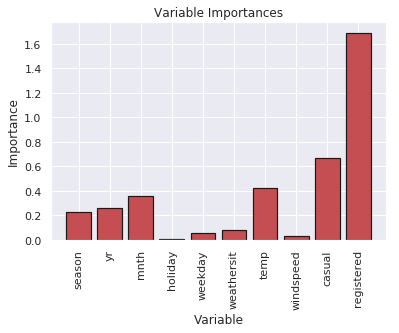

In [47]:
# List of x locations for plotting
x_values = list(range(len(mir_result)))

# Make a bar chart
plt.bar(x_values, mir_result, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x- axis
plt.xticks(x_values, train_variables_one_1, rotation = 'vertical')

# Axis Labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')

In [48]:
# The above graph is stating that only few features are imp to decide the accuracy of model
# Now we will check our model accuracy by reducing the features
train_feature_two = train[['yr', 'mnth', 'weekday', 'workingday', 'temp', 'casual', 'registered']].values
test_feature_two = test[['yr', 'mnth', 'weekday', 'workingday', 'temp', 'casual', 'registered']].values

# built random forest model
Rf_model_two = RandomForestRegressor(n_estimators = 500, random_state = 100).fit(train_feature_two, train_target_feature)
print(Rf_model_two)

# Predict the model using predict function
Rf_predict_two = Rf_model_two.predict(test_feature_two)

print(Rf_predict_two)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=100, verbose=0,
                      warm_start=False)
[4369.338 4424.916 5365.614 3731.886 6220.428 7689.136 7047.35  2375.08
 6391.268 2799.104 7349.328 2068.726 6812.    2029.168 5734.388 2435.936
 7279.49  3518.978 1612.25  3830.166 7012.138 3539.654 5275.322 6804.5
 7469.868 4141.204 6249.382 7547.908 1340.616 1720.142 4767.266 1474.248
 4861.226 4572.308 4919.874 2130.704 2764.684  980.498 1967.032 4182.28
 1382.89  3846.488 2719.814 5632.868 5591.806 6212.798 7296.702 7470.858
 5905.02  4711.578 6354.974 5758.448 6608.4   4837.77  4347.316 4001.618
 2441.286 4726.846 7106.35  56

In [49]:
# Evaluate Randome forest using MAPE
MAPE(test_target_feature, Rf_predict_two)

# Error rate : 2.074
# Here it is stating that the accuracy of the model increased slightly

1.6713230810645308

In [50]:
# Evaluate the model using RMSE

RMSE(test_target_feature, Rf_predict_two)

# RMSE : 106.282
# Accuracy and RMSE is improved

Mean Square :  7805.065826911562
Root Mean Square :  88.34628360554598


88.34628360554598

LINEAR REGRESSION

In [55]:
# Here same  features we will take what we took for the Linear Regression
# train_features_one = train[['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit', 'temp', 'windspeed', 'casual', 'registered']].values
# train_target_feature = train['cnt'].values
# test_feature = test[['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit', 'temp', 'windspeed', 'casual', 'registered']].values
# test_target_feature = test['cnt'].values
# test_target_feature

# import linear regression
# OLS : Ordinary Least Square

import statsmodels.api as sm

# develop Linear Regression model using sm.ols

linear_regression_model = sm.OLS(train_target_feature, train_features_one).fit()

# Summary of the model 
linear_regression_model.summary()

# predict the model

# predict_LR = linear_regression_model.predict(test_feature)

# print(predict_LR)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.693e+33
Date:                Tue, 01 Oct 2019   Prob (F-statistic):                        0.00
Time:                        09:03:09   Log-Likelihood:                          15373.
No. Observations:                 584   AIC:                                 -3.073e+04
Df Residuals:                     574   BIC:                                 -3.068e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           8.74e-13   6.69e-14     13.072      0.000    7.43e-13    1.01e-12
x2          1.023e-12   1.17e-13      8.767      0.000    7.94e-13    1.25e-12
x3         -1.563e-13   1.95e-14     -8.023      0.000   -1.95e-13   -1.18e-13
x4         -8.811e-13   2.21e-13     -3.988      0.000   -1.32e-12   -4.47e-13
x5          2.487e-14   1.86e-14      1.338      0.181   -1.16e-14    6.14e-14
x6          5.684e-14   6.52e-14      0.872      0.383   -7.11e-14    1.85e-13
x7          2.274e-13   3.04e-13      0.749      0.454   -3.69e-13    8.24e-13
x8          1.137e-13    4.1e-13      0.277      0.782   -6.91e-13    9.19e-13
x9             1.0000   7.09e-17   1.41e+16      0.000       1.000       1.000
x10            1.0000   4.57e-17   2.19e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                       24.494   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.590
Skew:                           0.336   Prob(JB):                     6.88e-09
Kurtosis:                       4.045   Cond. No.                     4.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
# predict the model

predict_LR = linear_regression_model.predict(test_feature)

print(predict_LR)

[4332. 4511. 5315. 3740. 6304. 7767. 6998. 2429. 6207. 2808. 7338. 1996.
 6891. 1927. 5713. 2417. 7286. 3487. 1600. 3894. 6879. 3649. 5202. 6825.
 7691. 4186. 6230. 7605. 1321. 1712. 4866. 1510. 4864. 4592. 4911. 2134.
 2832. 1000. 1913. 3910. 1406. 3785. 2633. 5633. 5629. 6196. 7264. 7458.
 6053. 4788. 6457. 5847. 6536. 4844. 4191. 4067. 2416. 4725. 7055. 5582.
 1977. 4595. 5976. 3068. 4763. 8120. 6591. 3767. 4826. 3820. 1162. 4333.
 3873. 6772. 5010. 4985. 1317. 4758. 8395. 3786. 5611. 5119. 4459. 6569.
 4294.  920. 6597. 8227. 4563. 5046. 8009. 6883. 3163. 4608. 5895. 3141.
 3777. 4972. 2927. 4066. 7030. 4363. 7006. 4773. 6786. 4036. 4840. 5409.
 3214. 6359. 6784. 3727. 3831. 2566. 3053. 4727. 3974. 3322. 7580. 4381.
 3333. 5259. 4401. 5566. 5260. 6734. 1495. 6855. 7410. 7693. 6966. 4058.
 5986. 4105. 7393. 4270. 6536. 4086. 6904.  683. 4120. 1530. 1536. 5170.
 1301. 3598. 3422.]


In [58]:
# Evaluate using MAPE
MAPE(test_target_feature, predict_LR)
# MAPE is 1.97

# Predict the model using RMSE
RMSE(test_target_feature, predict_LR)
# RMSE : 8.73



Mean Square :  7.629088196346324e-25
Root Mean Square :  8.734465179017158e-13


8.734465179017158e-13